# Hedging Strategies in Gamma Trading

In this notebook we show the P&L in delta hedged options, how gamma impacts hedged P&L and gamma rebalancing.

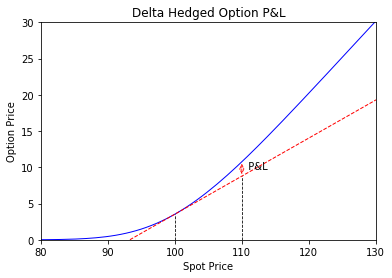

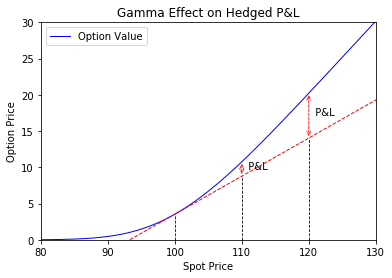

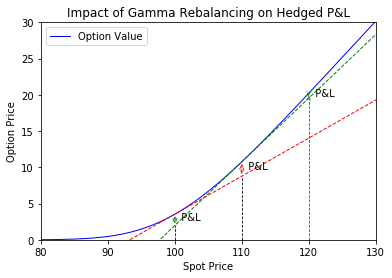

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

def option_price(spot, strike, vol, tau, r, phi):
    var = vol * np.sqrt(tau)
    d1 = (np.log(spot / strike) + r * tau + 0.5 * var ** 2) / var
    d2 = d1 - var

    v1 = scipy.stats.norm.cdf(phi * d1)
    v2 = scipy.stats.norm.cdf(phi * d2)

    price = phi * (spot * v1 - strike * np.exp(-r * tau) * v2)

    return price


def option_delta(spot, strike, vol, tau, r, phi):
    var = vol * np.sqrt(tau)
    d1 = (np.log(spot / strike) + r * tau + 0.5 * var ** 2) / var
    v1 = scipy.stats.norm.cdf(phi * d1)

    delta = phi * v1

    return delta


def plot_delta_hedge():
    strike = 100
    vol = 0.3
    tau = 1.0 / 12
    r = 0.02
    phi = 1.0

    # call options
    spots = np.linspace(0, 150, num=200)
    spots[0] = 0.001
    prices = option_price(spots, strike, vol, tau, r, phi)

    p1 = np.array([100.0])
    v1 = option_price(p1, strike, vol, tau, r, phi)[0]
    d1 = option_delta(p1, strike, vol, tau, r, phi)[0]

    def delta1_line(ps):
        return d1 * (ps - p1[0]) + v1

    p2 = np.array([110.0])
    v2 = option_price(p2, strike, vol, tau, r, phi)[0]
    d2 = option_delta(p2, strike, vol, tau, r, phi)[0]

    def delta2_line(ps):
        return d2 * (ps - p2[0]) + v2

    p3 = np.array([120.0])
    v3 = option_price(p3, strike, vol, tau, r, phi)[0]
    d3 = option_delta(p3, strike, vol, tau, r, phi)[0]

    delta1_line_prices = delta1_line(spots)
    delta2_line_prices = delta2_line(spots)

    # show delta hedged option P&L
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Delta Hedged Option P&L')
    plt.xlim(80.0, 130.0)
    plt.ylim(0, 30.0)
    l1,  = plt.plot(spots, prices, color='blue', lw=1)
    l2, = plt.plot(spots, delta1_line_prices, color='red', lw=1, ls='--')

    plt.vlines(p1[0], 0.0, v1, ls='--', lw=0.8)
    plt.vlines(p2[0], 0.0, delta1_line(p2)[0], ls='--', lw=0.8)

    plt.annotate('', xy=(p2[0], delta1_line(p2)[0]), xycoords='data',
                 xytext=(p2[0], v2), textcoords='data',
                 arrowprops=dict(color='red', arrowstyle='<->', ls='--', lw=0.8))

    plt.annotate('  P&L', xy=(p2[0], (delta1_line(p2)[0] + v2)/2), xycoords='data',
                 textcoords='data', ha='left')
    plt.show()

    # show gamma effect on delta hedged option P&L
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Gamma Effect on Hedged P&L')
    plt.xlim(80.0, 130.0)
    plt.ylim(0, 30.0)
    l1,  = plt.plot(spots, prices, color='blue', lw=1)
    l2, = plt.plot(spots, delta1_line_prices, color='red', lw=1, ls='--')
    plt.vlines(p1[0], 0.0, v1, ls='--', lw=0.8)
    plt.vlines(p2[0], 0.0, delta1_line(p2)[0], ls='--', lw=0.8)

    plt.annotate('', xy=(p2[0], delta1_line(p2)[0]), xycoords='data',
                 xytext=(p2[0], v2), textcoords='data',
                 arrowprops=dict(color='red', arrowstyle='<->', ls='dashed', lw=0.8))

    plt.annotate('  P&L', xy=(p2[0], (delta1_line(p2)[0] + v2)/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.vlines(p3[0], 0.0, delta1_line(p3)[0], ls='--', lw=0.8)
    plt.annotate('', xy=(p3[0], delta1_line(p3)[0]), xycoords='data',
                 xytext=(p3[0], v3), textcoords='data',
                 arrowprops=dict(color='red', arrowstyle='<->', ls='dashed', lw=0.8))

    plt.annotate('  P&L', xy=(p3[0], (delta1_line(p3)[0] + v3)/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.legend([l1], ['Option Value'])
    plt.show()

    # show effect of gamma rebalancing
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Impact of Gamma Rebalancing on Hedged P&L')
    plt.xlim(80.0, 130.0)
    plt.ylim(0, 30.0)
    l1,  = plt.plot(spots, prices, color='blue', lw=1)
    l2, = plt.plot(spots, delta1_line_prices, color='red', lw=1, ls='--')
    l3, = plt.plot(spots, delta2_line_prices, color='green', lw=1, ls='--')

    plt.vlines(p1[0], 0.0, delta2_line(p1)[0], ls='--', lw=0.8)
    plt.vlines(p2[0], 0.0, delta1_line(p2)[0], ls='--', lw=0.8)
    plt.vlines(p3[0], 0.0, delta2_line(p3)[0], color='green', ls='--', lw=0.8)

    plt.annotate('', xy=(p2[0], delta1_line(p2)[0]), xycoords='data',
                 xytext=(p2[0], v2), textcoords='data',
                 arrowprops=dict(color='red', arrowstyle='<->', ls='dashed', lw=0.8))

    plt.annotate('  P&L', xy=(p2[0], (delta1_line(p2)[0] + v2)/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.annotate('', xy=(p3[0], delta2_line(p3)[0]), xycoords='data',
                 xytext=(p3[0], v3), textcoords='data',
                 arrowprops=dict(color='green', arrowstyle='<->', ls='dashed', lw=0.8))

    plt.annotate('  P&L', xy=(p3[0], (delta2_line(p3)[0] + v3)/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.annotate('', xy=(p1[0], delta2_line(p1)[0]), xycoords='data',
                 xytext=(p1[0], v1), textcoords='data',
                 arrowprops=dict(color='green', arrowstyle='<->', ls='dashed', lw=0.8))

    plt.annotate('  P&L', xy=(p1[0], (delta2_line(p1)[0] + v1)/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.legend([l1], ['Option Value'])
    plt.show()

    
plot_delta_hedge()